In [118]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.rcParams['figure.dpi'] = 150



In [119]:
santander_locations = pd.read_csv('../data/santander_locations.csv')
santander_locations.head()

,Station.Id,StationName,longitude,latitude,Easting,Northing
0,1,"River Street, Clerkenwell",-0.109971,51.5292,531202.520,182832.020
1,2,"Phillimore Gardens, Kensington",-0.197574,51.4996,525207.070,179391.860
2,3,"Christopher Street, Liverpool Street",-0.084606,51.5213,532984.810,182001.530
3,4,"St. Chad's Street, King's Cross",-0.120974,51.5301,530436.760,182911.990
4,5,"Sedding Street, Sloane Square",-0.156876,51.4931,528051.649,178742.097


In [130]:
path = '../data/santander_summaries'
data_files = os.listdir(path)
n_weeks = len(data_files)
bike_data = {file[4:23]: pd.read_csv(path + '/' + file,
                                     names=["start_loc", "end_loc",
                                            "start_t", "end_t"])
             for file in data_files}

print(list(bike_data.values())[0].head())

for name in bike_data.keys():
    bike_data[name] = bike_data[name].assign(dist=lambda x:
                                             abs(x.end_loc - x.start_loc))
    bike_data[name] = bike_data[name].assign(time_elapsed=lambda x:
                                             abs(x.start_t - x.end_t))

print(list(bike_data.values())[0].head())


   start_loc  end_loc   start_t  end_t
0         47       56  55728000   1500
1        762      600  55728000    540
2        588      698  55728060    420
3        456      456  55728120  12240
4         67       67  55728120    660
   start_loc  end_loc   start_t  end_t  dist  time_elapsed
0         47       56  55728000   1500     9      55726500
1        762      600  55728000    540   162      55727460
2        588      698  55728060    420   110      55727640
3        456      456  55728120  12240     0      55715880
4         67       67  55728120    660     0      55727460


dict_values([55791900, 55706220, 48173580, 50954220, 49139700, 50347320, 53978040, 51645180, 56826000, 47661240, 53892000, 49743960, 48707460, 55100460, 53287320, 52163160])


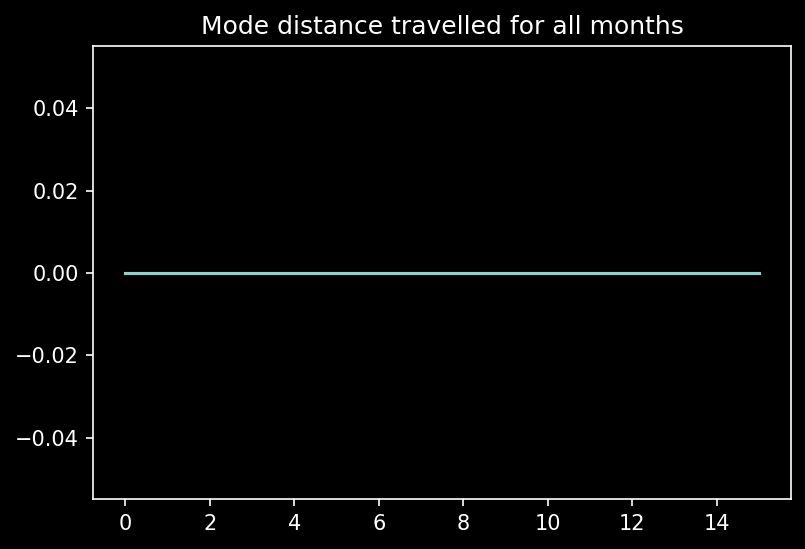

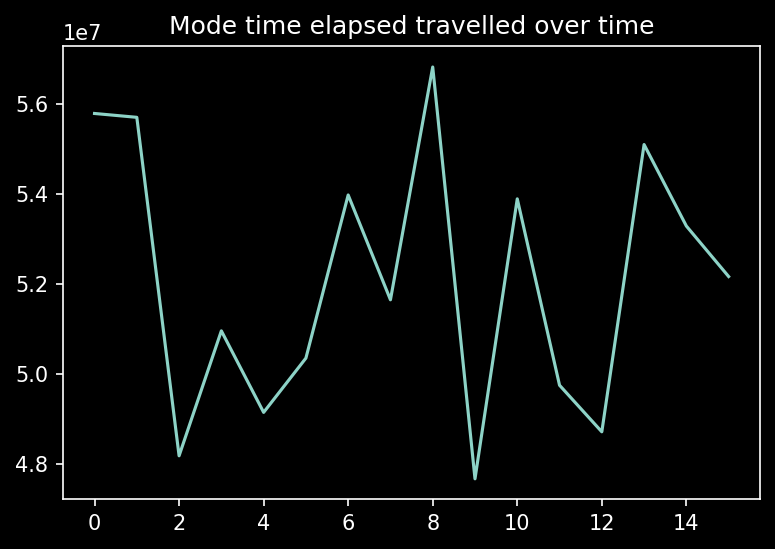

In [127]:
mean_dist = {name: df.dist.mean()
             for name, df in bike_data.items()}
mean_time_elapsed = {name: df.time_elapsed.mean()
                     for name, df in bike_data.items()}

mode_dist = {name: df.dist.mode().get(0)
             for name, df in bike_data.items()}
mode_time_elapsed = {name: df.time_elapsed.mode().get(0)
                     for name, df in bike_data.items()}

plt.figure(1)
plt.title("Mode distance travelled for all months")
plt.plot(mode_dist.values())

plt.figure(2)
plt.title("Mode time elapsed travelled over time")
plt.plot(mode_time_elapsed.values())
print(mode_time_elapsed.values())

median_dist = {name: df.dist.median()
               for name, df in bike_data.items()}
median_time_elapsed = {name: df.time_elapsed.median()
                       for name, df in bike_data.items()}









